basic prepoccessing

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Case folding (penyetaraan kapital->lowercase)

In [2]:
sentence = "Pemerintah mnerapkan PSBB untuk menangani Virus Corona."

# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print(lowercase_sentence)

pemerintah mnerapkan psbb untuk menangani virus corona.


Tokenizing (pemecahan perkata Selain itu pada tahap inijuga akan dilakukan proses removing number, whitespace dan puctuation (tanda baca).)

In [ ]:

import string
import re #regex library

# import word_tokenize from NLTK
from nltk.tokenize import word_tokenize



# sentence input
sentence = "Sebelumnya, \n kasus positif virus Corona pada 24 April sebanyak 8.211 orang. \n Jumlah pasien sembuh Corona di RI ada 1.002 orang dan meninggal 689 orang."



# ------ Case Folding --------
# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print('Case Folding Result : \n')
print(lowercase_sentence)
print('\n\n\n')

# ------ Tokenizing ---------
#remove angka
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

#remove punctuation(simbol)
lowercase_sentence = lowercase_sentence.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

#remove multiple whitespace into single whitespace
lowercase_sentence = re.sub(r'\s+',' ',lowercase_sentence)


tokens = nltk.tokenize.word_tokenize(lowercase_sentence) #.word_tokenize()->fungsi untuk tokenizing

print('Tokenizing Result : \n')
print(tokens)

Case Folding Result : 

sebelumnya, 
 kasus positif virus corona pada 24 april sebanyak 8.211 orang. 
 jumlah pasien sembuh corona di ri ada 1.002 orang dan meninggal 689 orang.




Tokenizing Result : 

['sebelumnya', 'kasus', 'positif', 'virus', 'corona', 'pada', 'april', 'sebanyak', 'orang', 'jumlah', 'pasien', 'sembuh', 'corona', 'di', 'ri', 'ada', 'orang', 'dan', 'meninggal', 'orang']


reqdist(cek kemunculan suatu kata)

In [4]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


# sentence input
sentence = "Sebelumnya, \n kasus positif virus Corona pada 24 April sebanyak 8.211 orang. \n Jumlah pasien sembuh Corona di RI ada 1.002 orang dan meninggal 689 orang."



# ------ Case Folding --------
# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print('Case Folding Result : \n')
print(lowercase_sentence)
print('\n\n\n')

# ------ Tokenizing ---------
#remove angka
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

#remove punctuation
lowercase_sentence = lowercase_sentence.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

#remove multiple whitespace into single whitespace
lowercase_sentence = re.sub(r'\s+',' ',lowercase_sentence)


tokens = nltk.tokenize.word_tokenize(lowercase_sentence)

print('Tokenizing Result : \n')
print(tokens)
print('\n\n\n')

freq_tokens = nltk.FreqDist(tokens) #hitung frekuensi kemunculan kata setelah di word_tokenizing(pemisahan kata)

print('Frequency Tokens : \n')
print(freq_tokens.most_common())

Case Folding Result : 

sebelumnya, 
 kasus positif virus corona pada 24 april sebanyak 8.211 orang. 
 jumlah pasien sembuh corona di ri ada 1.002 orang dan meninggal 689 orang.




Tokenizing Result : 

['sebelumnya', 'kasus', 'positif', 'virus', 'corona', 'pada', 'april', 'sebanyak', 'orang', 'jumlah', 'pasien', 'sembuh', 'corona', 'di', 'ri', 'ada', 'orang', 'dan', 'meninggal', 'orang']




Frequency Tokens : 

[('orang', 3), ('corona', 2), ('sebelumnya', 1), ('kasus', 1), ('positif', 1), ('virus', 1), ('pada', 1), ('april', 1), ('sebanyak', 1), ('jumlah', 1), ('pasien', 1), ('sembuh', 1), ('di', 1), ('ri', 1), ('ada', 1), ('dan', 1), ('meninggal', 1)]


visualisasi freq_tokens

<Axes: xlabel='Key'>

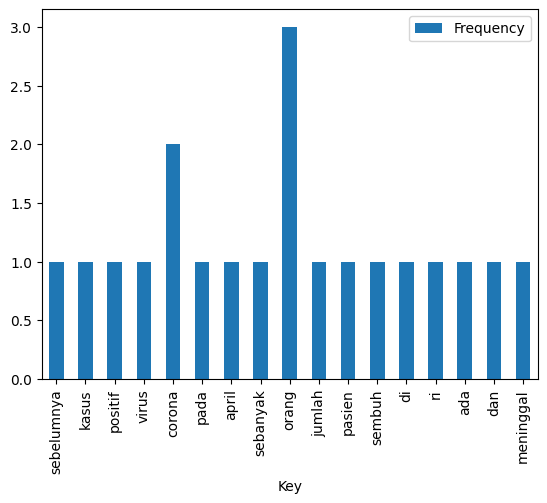

In [6]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

filltering stopword removal (menghilangkan kata umum yang memiliki frekuensi tertingi yang kemungkinan tidak memiliki makna)

In [7]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

# get Indonesian stopword
list_stopwords = set(stopwords.words('indonesian'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]


print(tokens_without_stopword)

['orang', 'corona', 'positif', 'virus', 'april', 'pasien', 'sembuh', 'ri', 'meninggal']


stemming nltk belum support indonesian language

In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
        'died', 'agreed', 'owned', 'humbled', 'sized',
        'meeting', 'stating', 'siezing', 'itemization',
        'sensational', 'traditional', 'reference', 'colonizer',
        'plotted']

singles = [(plural + " : " + stemmer.stem(plural)) for plural in plurals]

singles

['caresses : caress',
 'flies : fli',
 'dies : die',
 'mules : mule',
 'denied : deni',
 'died : die',
 'agreed : agre',
 'owned : own',
 'humbled : humbl',
 'sized : size',
 'meeting : meet',
 'stating : state',
 'siezing : siez',
 'itemization : item',
 'sensational : sensat',
 'traditional : tradit',
 'reference : refer',
 'colonizer : colon',
 'plotted : plot']

stemming(menghapus kata imbuhan diawal dan diakhir) indonesian language emenggunakan library sastrawi

In [9]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['orang : orang',
 'corona : corona',
 'positif : positif',
 'virus : virus',
 'april : april',
 'pasien : pasien',
 'sembuh : sembuh',
 'ri : ri',
 'meninggal : tinggal']